In [ ]:
#!pip install -U seaborn

In [1]:
# Importa os pacotes de manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a formatação padrão para a visualização de dataframes 
# completos e números com 2 casas decimais
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Traz o dataframe à partir do csv de dados de crédito bancário
df = pd.read_csv(".\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,0.00,1.00


## 1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.

In [3]:
df.duplicated().sum()

0

In [4]:
df.duplicated(subset=['CLIENTNUM']).sum()

0

In [5]:
# Excluindo colunas que contém 'Naive_Bayes', que são colunas 
# numéricas usadas para modelagem, e o número do cliente
# que é uma coluna numérica que seria utilizada somente como 
# chave primária para cruzar com outros dataframes, e não carrega
# informação acionável
drop_col = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df1 = df.drop(drop_col, axis=1)
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00


In [6]:
print(df1.shape)
df1.info()

(10127, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [7]:
# Separamos as colunas de acordo com o tipo de dado que carregam, numéricos ou categóricos
headers = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [8]:
# Para observarmos o range de valores que cada coluna pode apresentar,
# para cada coluna, pegamos seus valores únicos e ordenamos em ordem crescente
for col in headers:
    print(f'{col} \n {np.sort(df[col].unique())} \n')

Attrition_Flag 
 ['Attrited Customer' 'Existing Customer'] 

Customer_Age 
 [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 73] 

Gender 
 ['F' 'M'] 

Dependent_count 
 [0 1 2 3 4 5] 

Education_Level 
 ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown'] 

Marital_Status 
 ['Divorced' 'Married' 'Single' 'Unknown'] 

Income_Category 
 ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown'] 

Card_Category 
 ['Blue' 'Gold' 'Platinum' 'Silver'] 

Months_on_book 
 [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56] 

Total_Relationship_Count 
 [1 2 3 4 5 6] 

Months_Inactive_12_mon 
 [0 1 2 3 4 5 6] 

Contacts_Count_12_mon 
 [0 1 2 3 4 5 6] 

Credit_Limit 
 [ 1438.3  1439.   1440.  ... 34458.  34496.  34516. ] 

Total_Revolving_Bal 
 [   0  132  134 ... 2513 25

In [9]:
for col in cat_cols:
    print(f'{col} \n {df[col].value_counts()} \n')

Attrition_Flag 
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Gender 
 F    5358
M    4769
Name: Gender, dtype: int64 

Education_Level 
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Marital_Status 
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Income_Category 
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Card_Category 
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



In [10]:
# Além da visualização dos valores únicos, o df.describe
# nos mostra uma ideia da distribuição das colunas numéricas 
df1.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,46.33,2.35,35.93,3.81,2.34,2.46,"8,631.95","1,162.81","7,469.14",0.76,"4,404.09",64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,"9,088.78",814.99,"9,090.69",0.22,"3,397.13",23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,"1,438.30",0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,"2,555.00",359.00,"1,324.50",0.63,"2,155.50",45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,"4,549.00","1,276.00","3,474.00",0.74,"3,899.00",67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,"11,067.50","1,784.00","9,859.00",0.86,"4,741.00",81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,"34,516.00","2,517.00","34,516.00",3.40,"18,484.00",139.00,3.71,1.00


#### Conclusão:

In [11]:
# shape =   linhas: 10127, atributos: 20
# info =    colunas categóricas: 6; colunas numéricas: 14
#           nenhuma coluna foi classificada errada

# apesar de não possuir valores Null ou NaN, ao verificar pela função 'unique', 3 colunas possuíam dados faltantes descritos como "Unknown"
#           Education_Level - Unknown    1519 - 15%
#           Marital_Status -  Unknown    749  - 7.39%
#           Income_Category - Unknown    1112 - 10.98%

# coluna 'Education_Level', oportunidade de unir 2 categorais em apenas 1 "Post-Graduate", devido baixa quantidade: Post-Graduate 516; Doctorate 451

# excluindo os valores 'Unknown', nenhuma outra discrepância foi identificada até o momento.

---  
## Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes

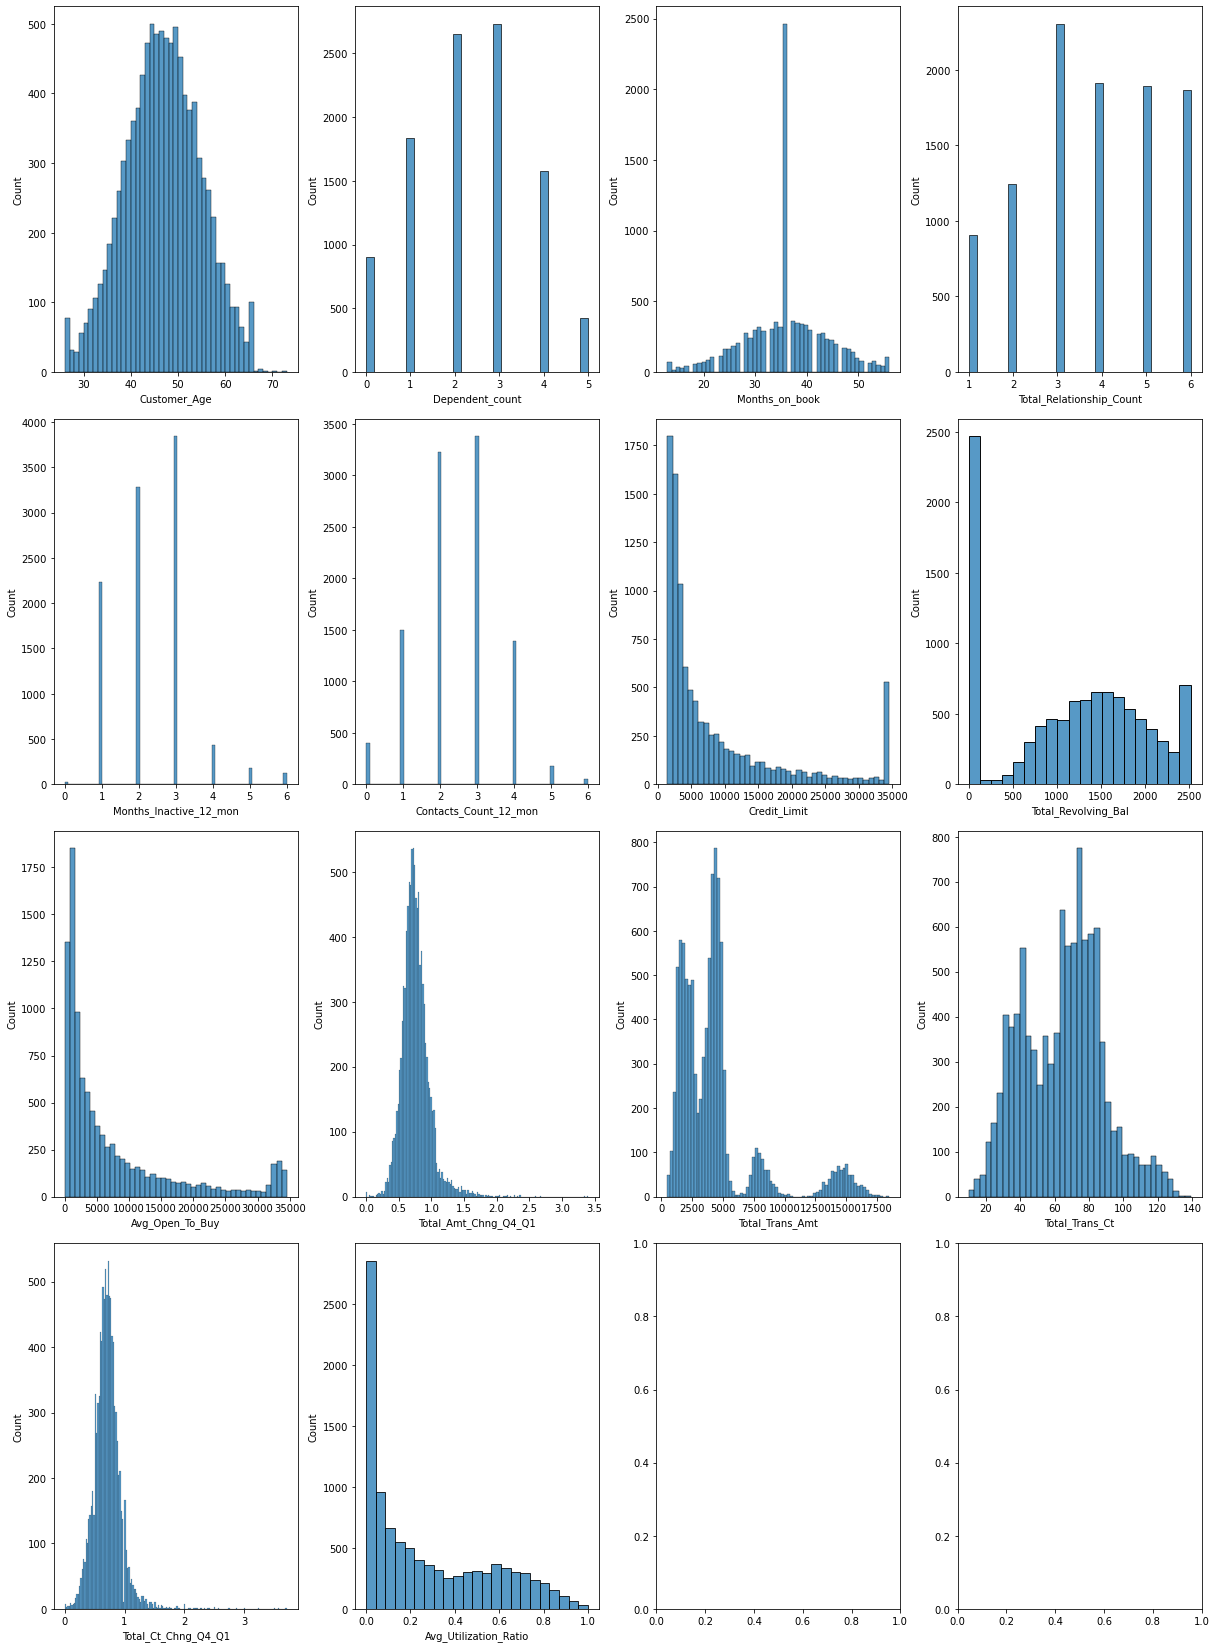

In [12]:
f, axes = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.histplot(data=df1, x=name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [13]:
# Conclusões:

# - idade: aproxima-se de uma distribuição normal
# - dependentes: maioria dos clientes tem 1ou+ dependente
# - tempo de cliente: aproxima-se de uma distribuição normal com alto desvio padrão. Porém 36 meses tem uma quantidade muito discrepante.
# 		será que teve alguma promoção 3 anos atrás?
#       além disso, a cada 5 ou 6 meses, existe um buraco na distribuição. Será que não são admitidos novos clientes em virada de semestre/ano fiscal? 
# - produtos: maioria dos clientes tem 3 ou + produtos do banco
# - inatividade últimos 12m:  alta inatividade nos últimos 3 meses  (será que os dados realmente representam os meses em sequência?)
# - contato com banco últimos 12m: muitos contatos nos últimos 4 meses
# - limite de crédito: distribuição exponencial, porém com um comportamento estranho para limite de 35k
# - crédito rotativo: maioria dos clientes não estão parcelando o pagamento da fatura, ou seja, pagam o total da fatura em dia
# - crédito disponível: perfil próximo ao limite de crédito, uma vez que maioria dos clientes pagam total da fatura em dia
# - dif Q4/Q1 em valor: maioria dos clientes gastou menos no final do ano (Q4) em relação ao início do ano (Q1). A quantidade de transações obedece mesmo perfil.
# - total valor transacionado: aparentemente 4 grupos com perfis distintos
# - quantidade de transações: aparentemente apenas 2 grupos com perfis diferentes
# - utilização média: maioria dos clientes para fatura total em dia, portanto grande parte possui uma utlização baixa do crédito rotativo

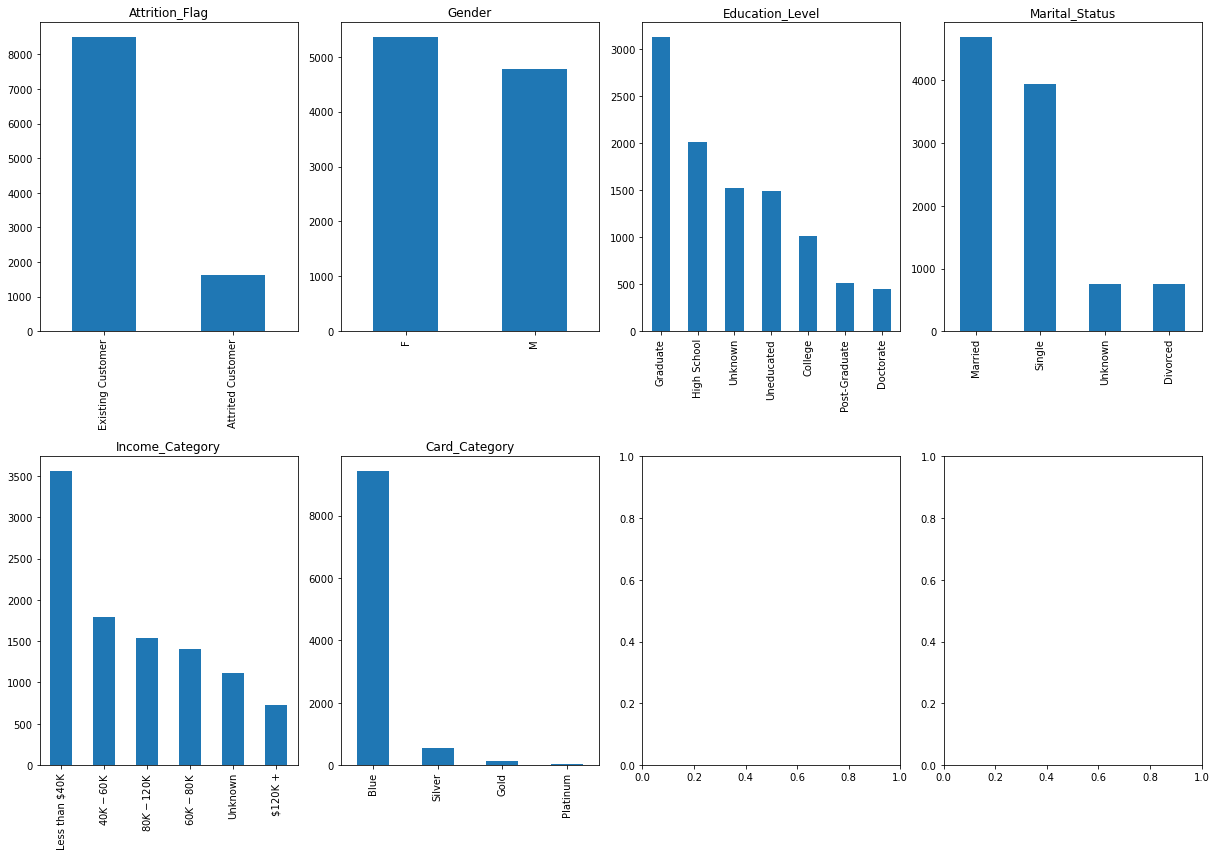

In [14]:
# Para a análise das variáveis categóricas, 
# cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
f1, axes1 = plt.subplots(2, 4, figsize=(17,12)) 
y=0

for name in cat_cols:
    i, j = divmod(y, 4)
    df[name].value_counts().plot(kind='bar',title = name, ax=axes1[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [15]:
# Attrition_Flag: A maioria dos dados da base são referentes a clientes atuais, mas pode ser interessante entender
#o perfil socioeconomico dos clientes que saíram
# Gênero: Temos uma distribuição esquilibrada de homens e mulheres
# Nível de Educação: Parece um perfil pouco educado, com aproximadamente 4500 sem diploma universitário, 
#o que pode explicar a baixa renda média 
# Status conjugal: Maioria dos clientes casados 
# Nível de Renda: Podemos observar que a maioria dos dos clientes ganha menos de 60K por ano
# Cartão: A grande maioria tem cartões Blue, os mais básicos. Pela pouca quantidade, 
#podemos tentar descobrir um nível de renda limite para os cartões mais avançados, 
#mas a análise do perfil de cliente pode ser irrelevante

In [16]:
# Com isso, temos um perfil geral dos clientes do banco. 
# Mas e a diferença entre os clientes que permanecem e os clientes que saíram (Attrited)?
# Para isso, separamos o dataframe em linhas de Attrited e Existing Customer na coluna "Attrition Flag"
Attrited = df[df["Attrition_Flag"] == 'Attrited Customer']
Existing = df[df["Attrition_Flag"] == 'Existing Customer']

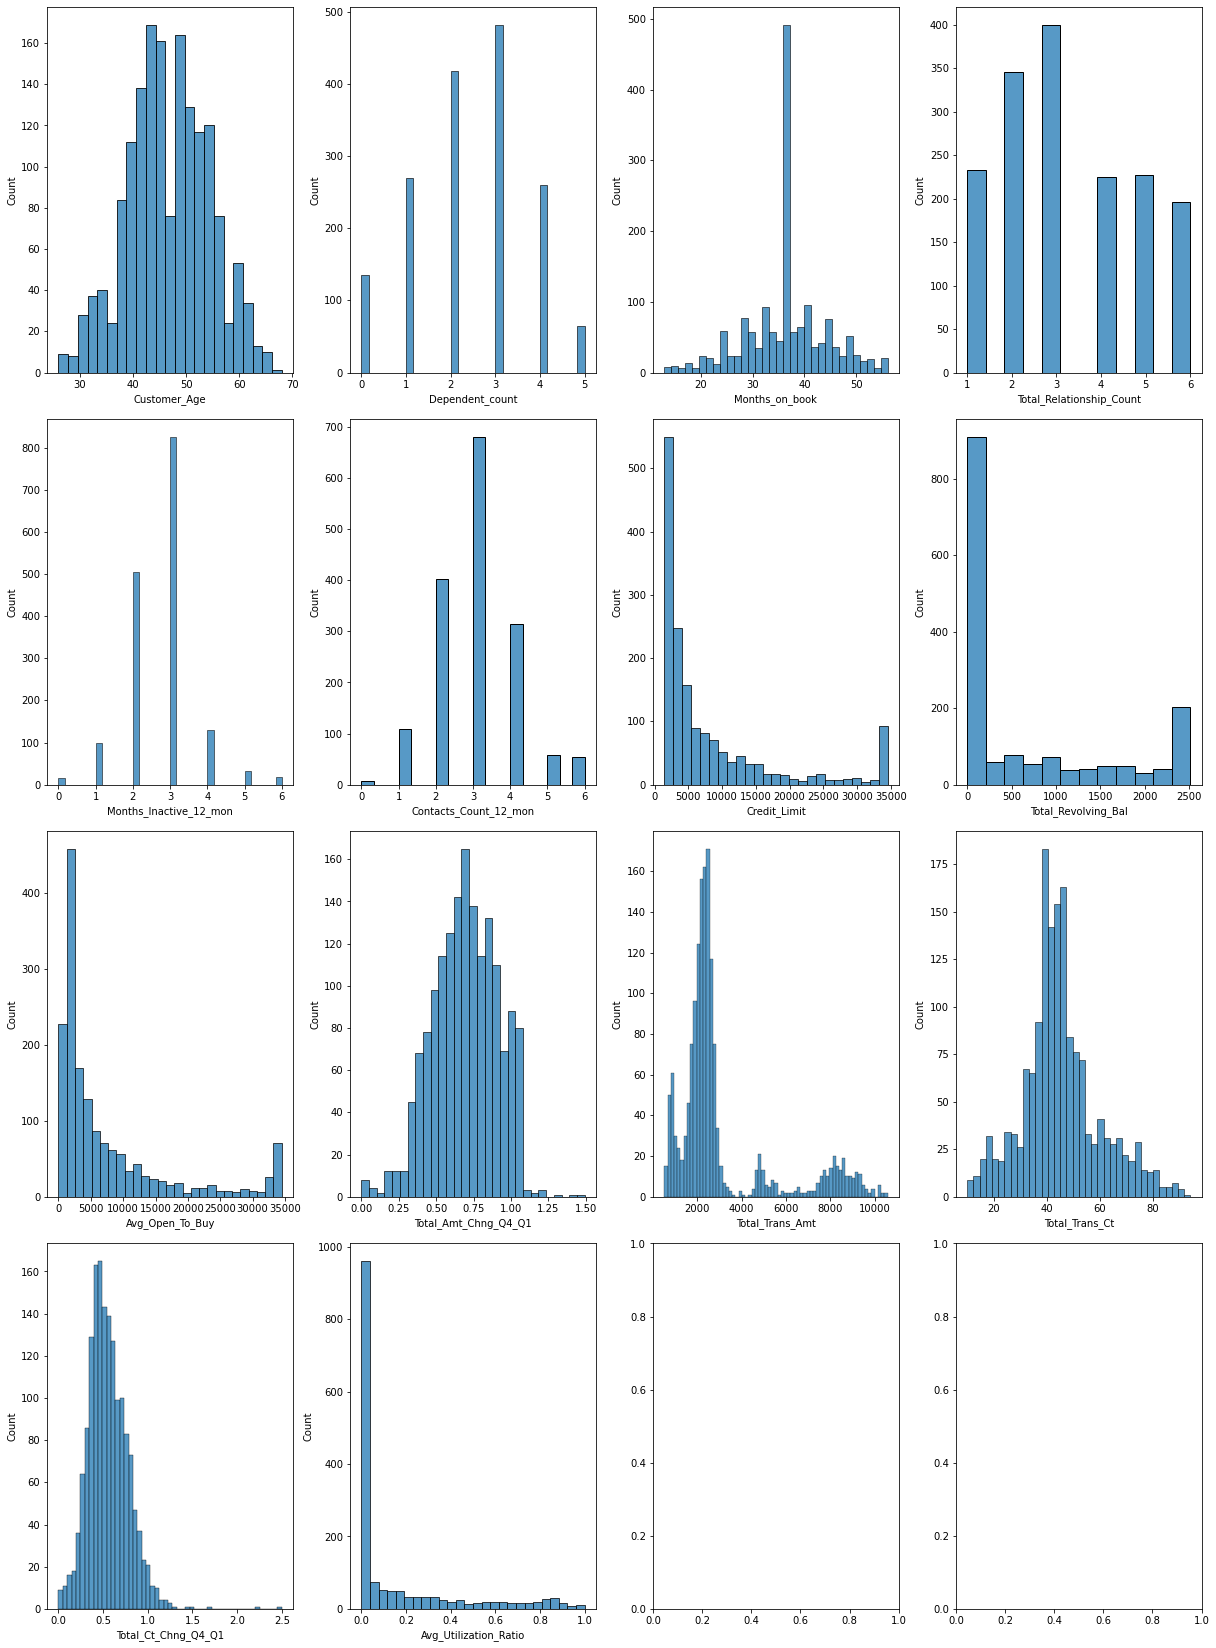

In [17]:
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.histplot(data=Attrited, x=name, ax=axes2[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [18]:
# CONCLUSÕES

# Nas variáveis numéricas, a grande diferença nas distribuições está no Total_Revolving Balance, 
# mais concentrada entre 0 e 500, Total_Transfer_Amount, mais concentrada em 2k e baixísssima Avg_Utilization_Ratio
# Além disso, entre 85% e 90% dos clientes atritados (?) diminuíram o uso do crédito (Total_Amt_Chng_Q4_Q1) no último ano
# Fora estes indicadores, o perfil socioeconômico é muito semelhante ao da base total

# Há um comportamento interessante nos clientes entre 46 e 48 anos, que representam menos dos clientes que saíram

In [19]:
# Nas variáveis categóricas, temos um comportamento semelhante ao do público geral

In [20]:
# Para analisar o pico que temos de clientes com 3 anos no banco:
df1['Months_on_book'].value_counts().head()
df36 = df1[df1['Months_on_book'] == 36]

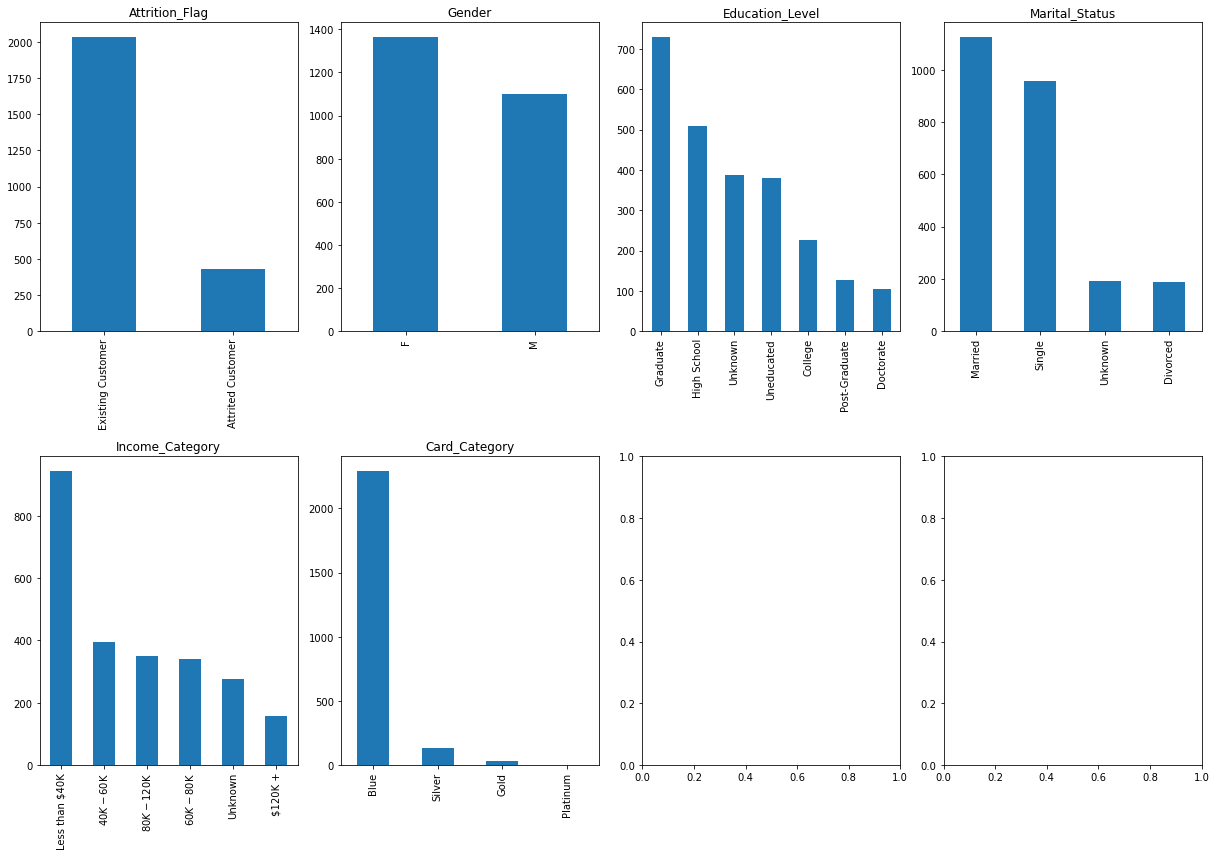

In [21]:
f4, axes4 = plt.subplots(2, 4, figsize=(17,12)) 
y=0

for name in cat_cols:
    i, j = divmod(y, 4)
    df36[name].value_counts().plot(kind='bar',title = name, ax=axes4[i, j])
    y+=1

plt.tight_layout()
plt.show()

----------------------------------------------

In [22]:
# Vamos obter visualizações entre Attrition_Flag e outras variáveis categóricas 
#para ver se há alguma dependência entre os recursos categóricos.

In [23]:
df1[cat_cols].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [24]:
pd.crosstab(df1['Gender'], df1['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


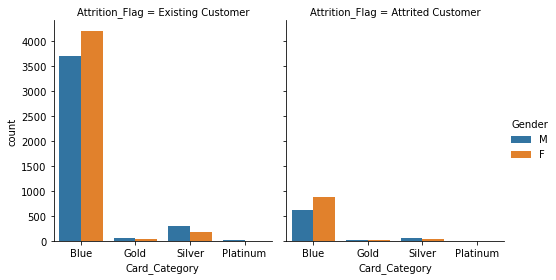

In [25]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df1, kind="count",
                height=4, aspect=.9);

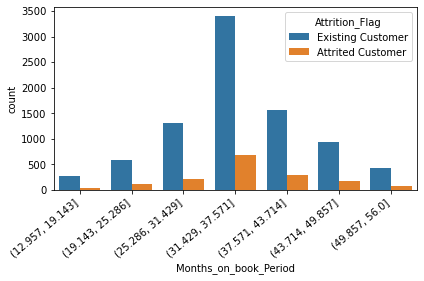

In [26]:
df1['Months_on_book_Period'] = pd.cut(df1['Months_on_book'],
                                                bins=int(df1['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

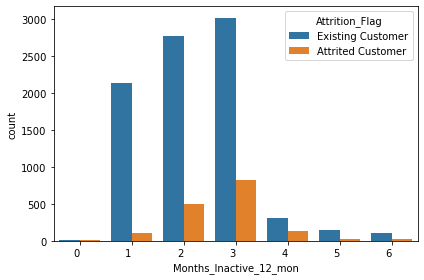

In [27]:

ax = sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.tight_layout()

In [28]:
df1['Customer_Age_period'] = pd.cut(np.array(df1['Customer_Age']), 
                                              bins=int(df1.Customer_Age.std()),
                                              precision=0)

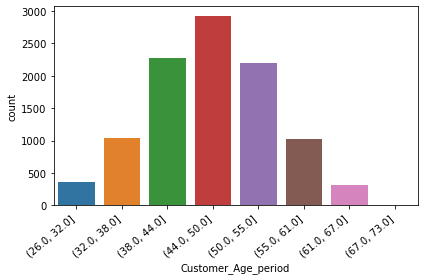

In [29]:
ax = sns.countplot(x="Customer_Age_period", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

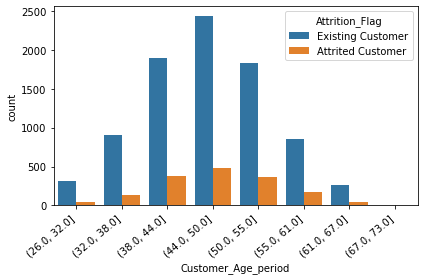

In [30]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

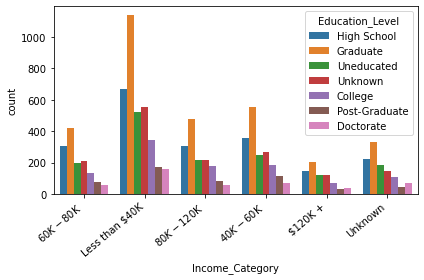

In [31]:
ax = sns.countplot(x='Income_Category', hue="Education_Level", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

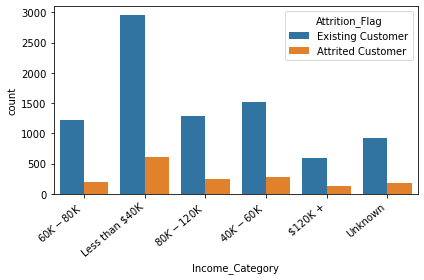

In [32]:
ax = sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

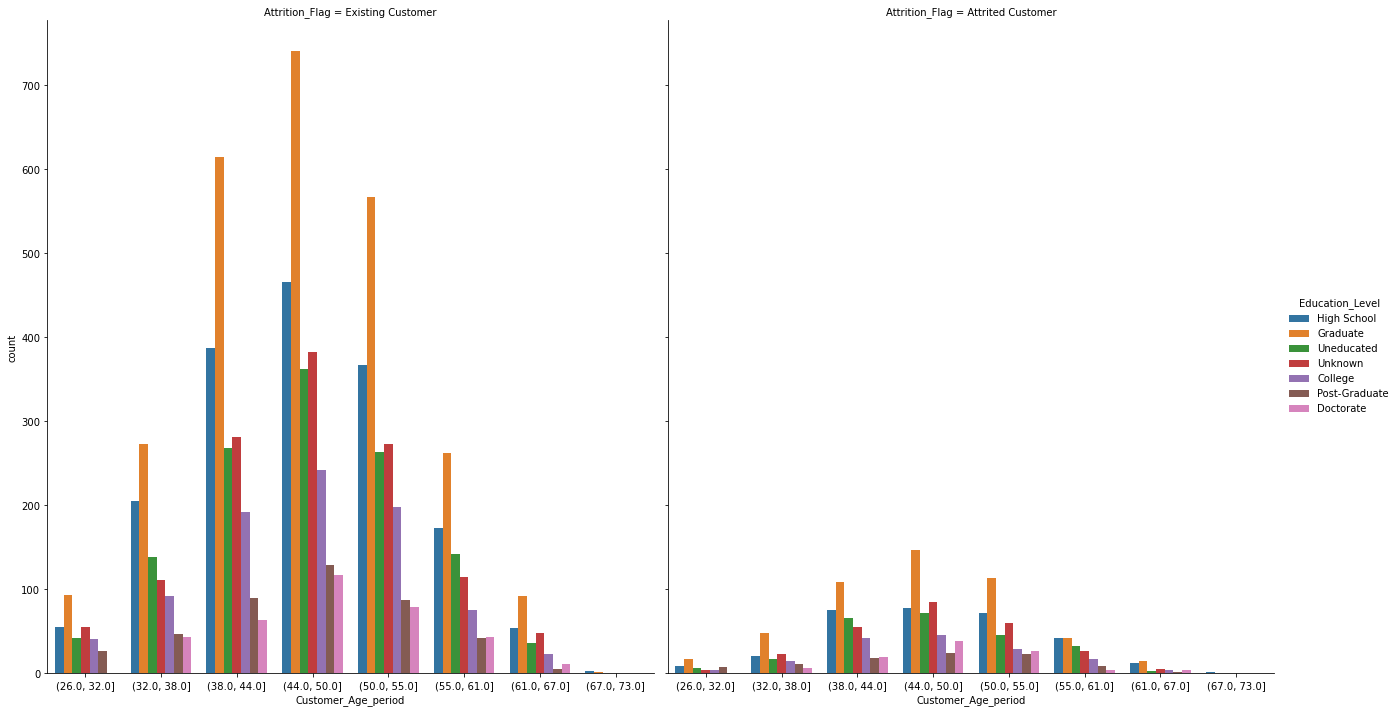

In [33]:
sns.catplot(x="Customer_Age_period", hue="Education_Level", col="Attrition_Flag",
                data=df1, kind="count",
                height=10, aspect=.9);

Attrition_Flag,Attrited Customer,Existing Customer,% all
Gender,,,
F,0.09,0.44,0.53
M,0.07,0.40,0.47
% all,0.16,0.84,1.00


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

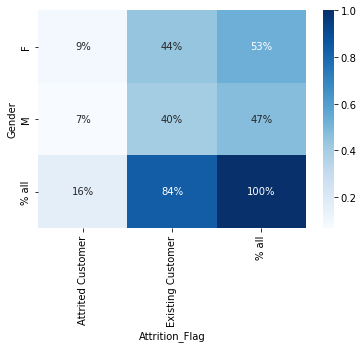

In [34]:
#Dado o gênero (feminino/masculino) qual é a probabilidade de ser attrited/existing???


cross = pd.crosstab(df1['Gender'], 
            df1['Attrition_Flag'], 
            margins = True, 
            margins_name = "% all", 
            normalize='all')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

---  
## Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados


In [39]:
my_pal = {Education_Level: "r" if Education_Level== "Unknown" else "b" for Education_Level in df.Education_Level.unique()}

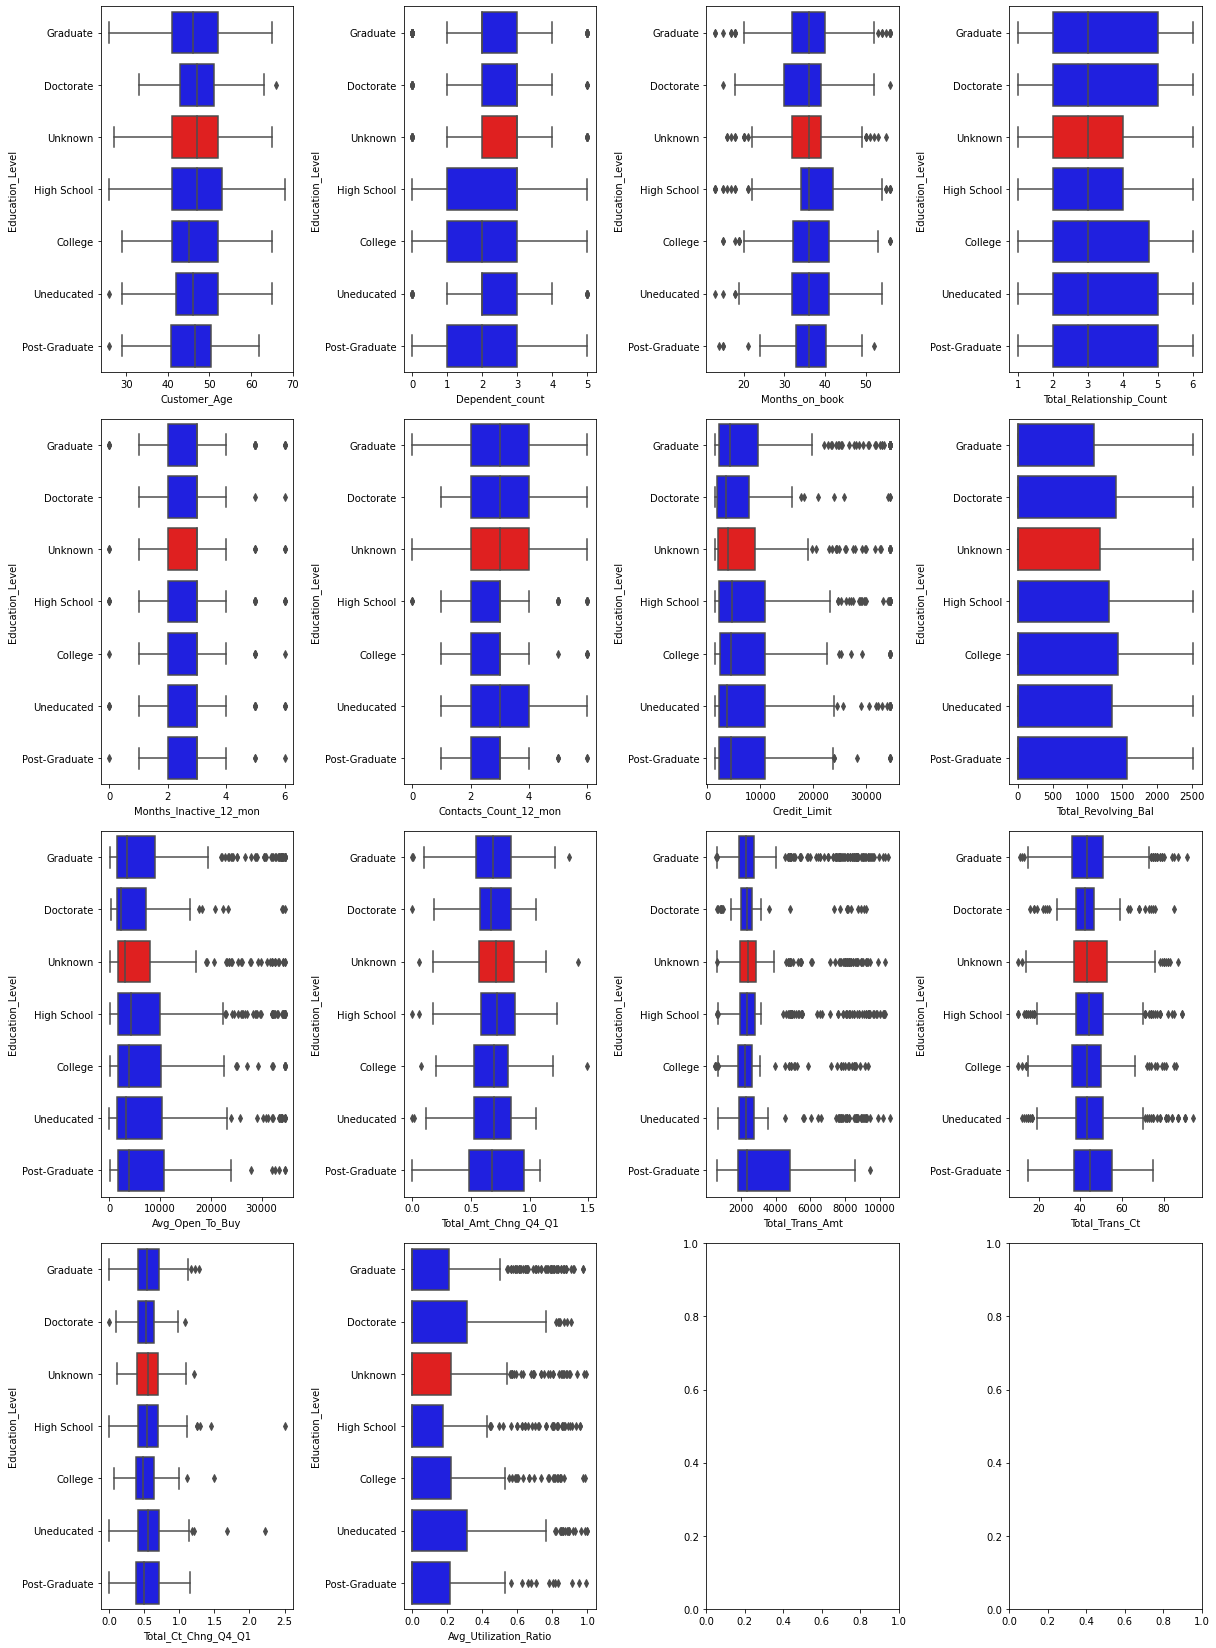

In [40]:
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Education_Level', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

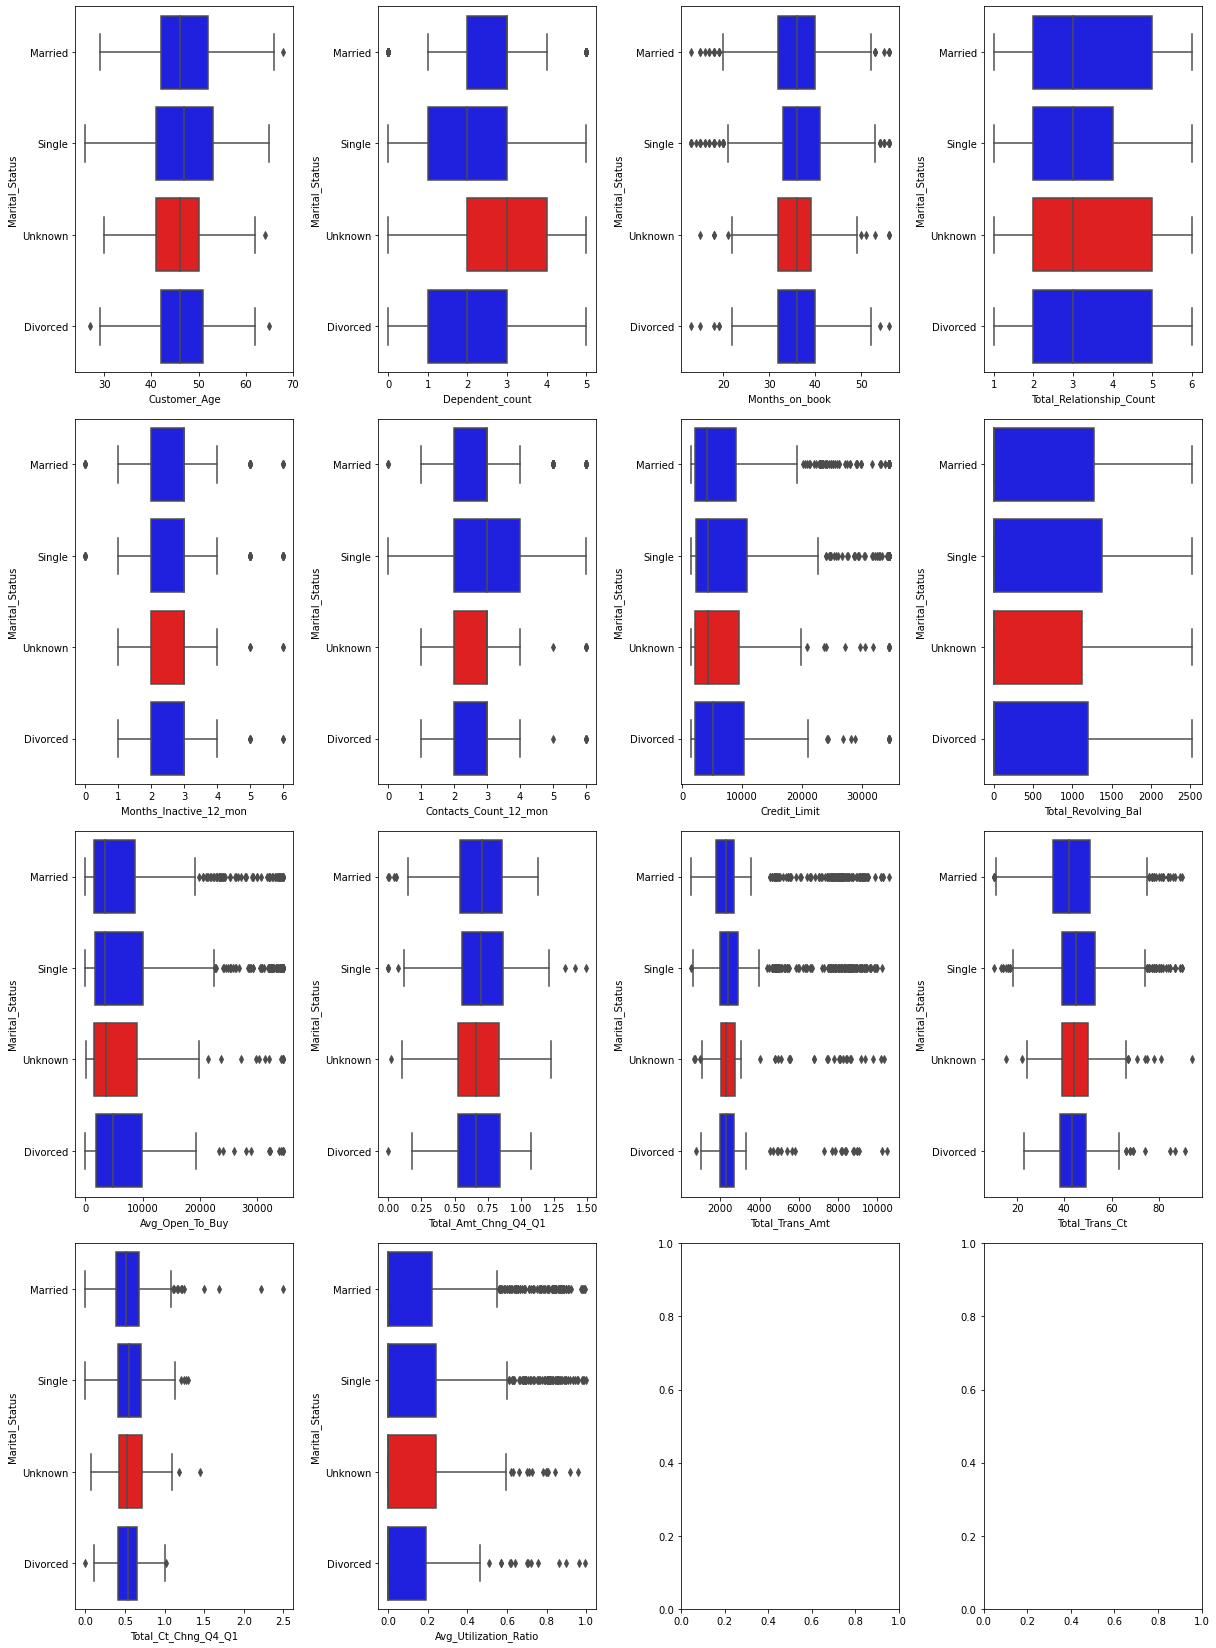

In [41]:
my_pal = {Marital_Status: "r" if Marital_Status== "Unknown" else "b" for Marital_Status in df.Marital_Status.unique()}
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Marital_Status', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

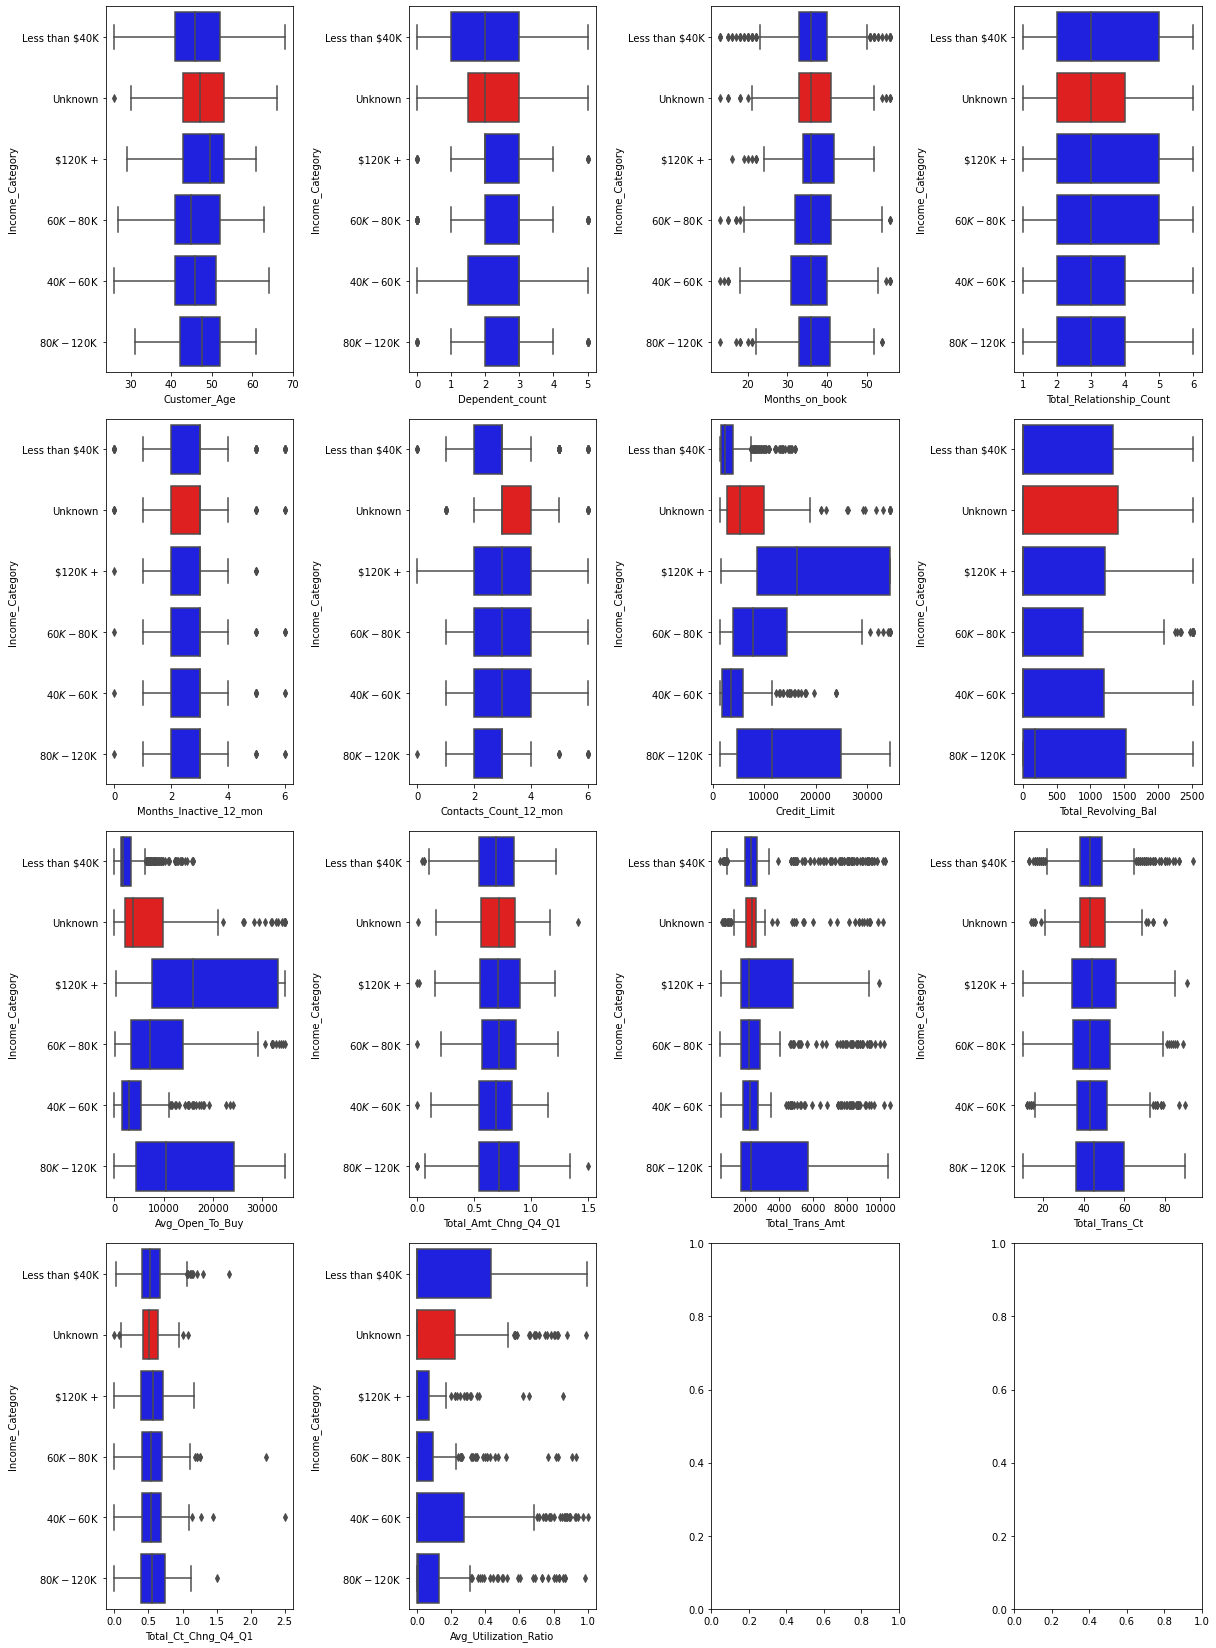

In [42]:
my_pal = {Income_Category: "r" if Income_Category== "Unknown" else "b" for Income_Category in df.Income_Category.unique()}
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Income_Category', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

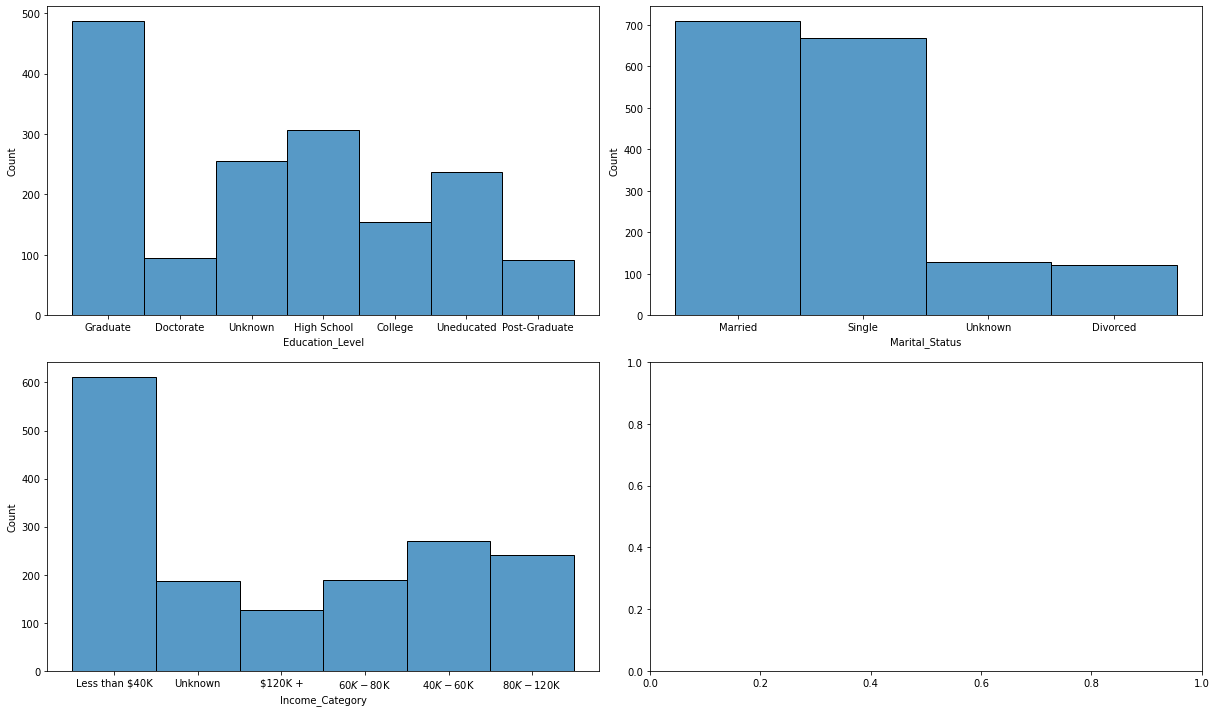

In [43]:
f2, axes2 = plt.subplots(2, 2, figsize=(17,10)) 
y=0

for name in ['Education_Level', 'Marital_Status', 'Income_Category']:
    i, j = divmod(y, 2)
    sns.histplot(data=Attrited, ax=axes2[i, j], x=name)
    y+=1

plt.tight_layout()
plt.show()

In [ ]:
df2 = df1.copy()

In [ ]:
# Como a quantidade de Unknows é expressiva optamos 
# por substituir seus respectivos valores pela moda das 
# respectivas colunas

df2.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)

## Correlação com Income_Category

## Income_Category

Menor de 40K -> 30K  
40K-60K -> 50K  
60K-80K -> 70K  
80K-120K -> 100K  
Maior que 120K -> 120K  

In [44]:
df_teste = df1.copy()
df_teste.Income_Category.replace({'Less than $40K':30000},inplace=True)
df_teste.Income_Category.replace({'$40K - $60K':50000},inplace=True)
df_teste.Income_Category.replace({'$60K - $80K':70000},inplace=True)
df_teste.Income_Category.replace({'$80K - $120K':100000},inplace=True)
df_teste.Income_Category.replace({'$120K +':120000},inplace=True)
df_teste.Income_Category.replace({'Unknown':np.nan},inplace=True)

<AxesSubplot:>

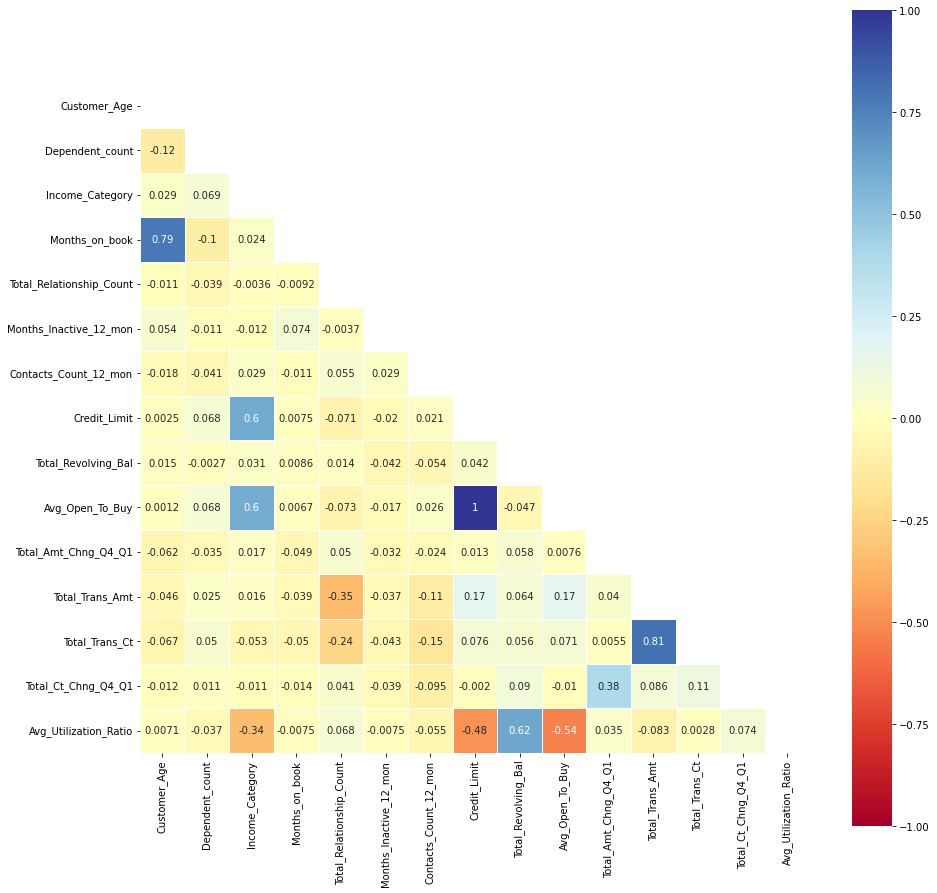

In [45]:
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
df_corr = df_teste.drop(columns=cat_cols)

mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

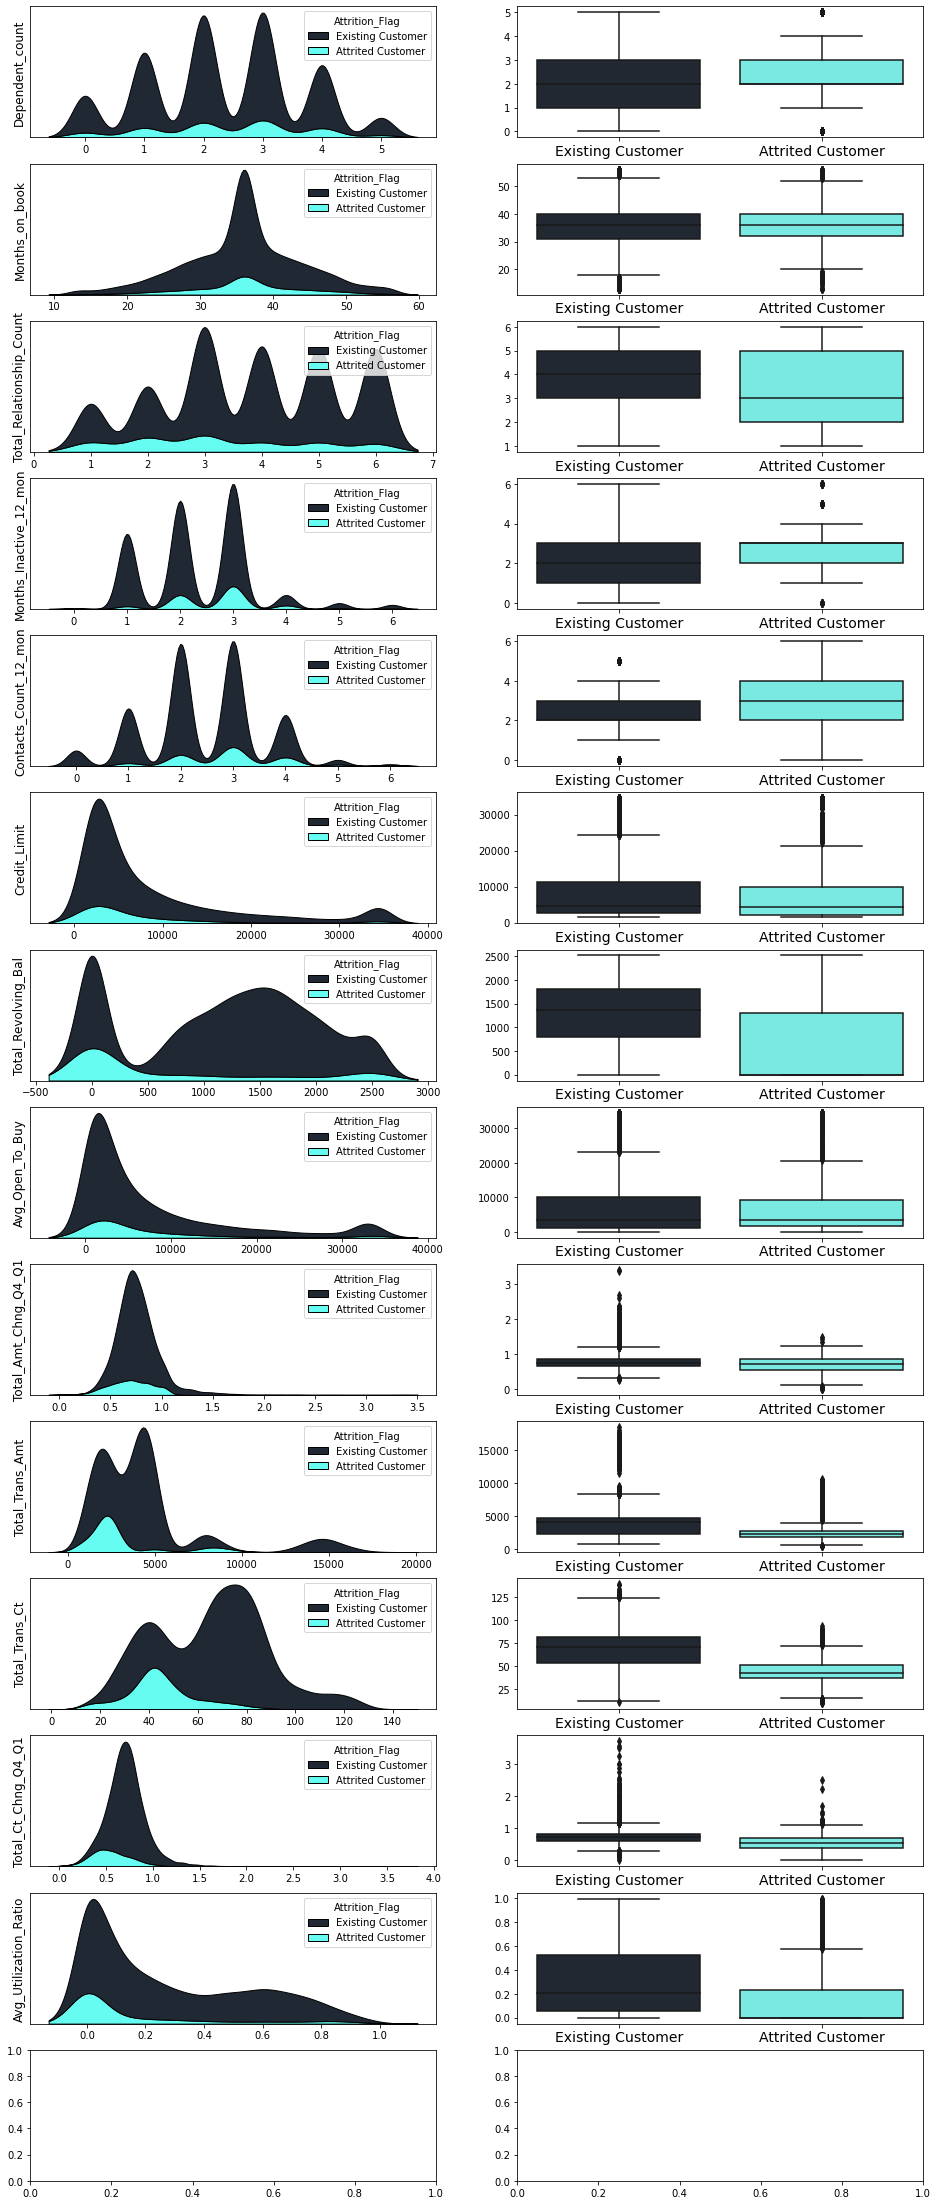

In [46]:
fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 40))

i = 0 #counter
for cols in num_cols[1:]:

    # Removing Outliers
    Q3 = df1[cols].quantile(0.99)
    df = df1[df1[cols] <= Q3]
    Q1 = df1[cols].quantile(0.01)
    df = df1[df1[cols] >= Q1]

    sns.kdeplot(df1[cols], fill=True, alpha=1, hue = df1['Attrition_Flag'], 
                palette=('#1f2833','#66fcf1'), multiple='stack', ax=ax[i,0])

    sns.boxplot(data= df1, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=('#1f2833','#66fcf1'), color='white')
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=12)
    i=i+1

plt.show()

In [49]:
# df2.loc[0,'Months_on_book_Period']

---
## Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?

In [50]:
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Months_on_book_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Months_on_book'].mean()

In [51]:
df2.groupby('Card_Category')['Avg_Months_on_book_per_Card_Category'].max()

Card_Category
Blue       35.96
Gold       35.53
Platinum   36.25
Silver     35.45
Name: Avg_Months_on_book_per_Card_Category, dtype: float64

In [52]:
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Credit_Limit_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Credit_Limit'].mean()

In [53]:
df2.groupby('Card_Category')['Avg_Credit_Limit_per_Card_Category'].max()

Card_Category
Blue        7,363.78
Gold       28,416.37
Platinum   30,283.45
Silver     25,277.84
Name: Avg_Credit_Limit_per_Card_Category, dtype: float64

In [54]:
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Avg_Utilization_Ratio_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Avg_Utilization_Ratio'].mean()

In [55]:
df2.groupby('Card_Category')['Avg_Avg_Utilization_Ratio_per_Card_Category'].max()

Card_Category
Blue       0.29
Gold       0.06
Platinum   0.04
Silver     0.06
Name: Avg_Avg_Utilization_Ratio_per_Card_Category, dtype: float64

In [56]:
df2['Avg_Trans_Amount'] = df2['Total_Trans_Amt']/df2['Total_Trans_Ct']

In [57]:
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Avg_Trans_Amount_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Avg_Trans_Amount']

In [58]:
df2.groupby(['Gender','Attrition_Flag','Card_Category'])['Avg_Avg_Trans_Amount_per_Card_Category'].max()

Gender  Attrition_Flag     Card_Category
F       Attrited Customer  Blue            177.67
                           Gold            142.81
                           Platinum        108.18
                           Silver          168.75
        Existing Customer  Blue            190.19
                           Gold            152.81
                           Platinum        135.87
                           Silver          158.29
M       Attrited Customer  Blue            180.06
                           Gold            136.73
                           Platinum         73.20
                           Silver          183.54
        Existing Customer  Blue            173.60
                           Gold            150.57
                           Platinum        141.36
                           Silver          161.72
Name: Avg_Avg_Trans_Amount_per_Card_Category, dtype: float64

In [59]:
df2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_on_book_Period,Customer_Age_period,Avg_Months_on_book_per_Card_Category,Avg_Credit_Limit_per_Card_Category,Avg_Avg_Utilization_Ratio_per_Card_Category,Avg_Trans_Amount,Avg_Avg_Trans_Amount_per_Card_Category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,"(37.571, 43.714]","(44.0, 50.0]",35.96,"7,363.78",0.29,27.24,27.24
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,"(43.714, 49.857]","(44.0, 50.0]",35.96,"7,363.78",0.29,39.12,39.12
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,"(31.429, 37.571]","(50.0, 55.0]",35.96,"7,363.78",0.29,94.35,94.35
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,"(31.429, 37.571]","(38.0, 44.0]",35.96,"7,363.78",0.29,58.55,58.55
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,"(19.143, 25.286]","(38.0, 44.0]",35.96,"7,363.78",0.29,29.14,29.14


In [60]:
cat_card = pd.CategoricalDtype( ['Blue', 'Silver', 'Gold', 'Platinum'], ordered=True)

df2['Card_Category'] = df2['Card_Category'].astype(cat_card)

df2.pivot_table(index = ['Gender', 'Attrition_Flag', 'Customer_Age'], columns = 'Card_Category', values = 'Avg_Avg_Trans_Amount_per_Card_Category', aggfunc = max).sort_values(by = 'Card_Category', axis = 1)

Card_Category                           Blue  Silver  Gold  Platinum
Gender Attrition_Flag    Customer_Age                               
F      Attrited Customer 26            47.35     NaN   NaN       NaN
                         27            66.03     NaN   NaN       NaN
                         28            54.20     NaN   NaN       NaN
                         29            64.47     NaN   NaN       NaN
                         30           146.70     NaN   NaN       NaN
...                                      ...     ...   ...       ...
M      Existing Customer 65            84.22   43.29   NaN       NaN
                         67            39.79     NaN   NaN       NaN
                         68            59.69     NaN   NaN       NaN
                         70            81.80     NaN   NaN       NaN
                         73            51.91     NaN   NaN       NaN

[167 rows x 4 columns]

In [61]:
df2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_on_book_Period,Customer_Age_period,Avg_Months_on_book_per_Card_Category,Avg_Credit_Limit_per_Card_Category,Avg_Avg_Utilization_Ratio_per_Card_Category,Avg_Trans_Amount,Avg_Avg_Trans_Amount_per_Card_Category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,"(37.571, 43.714]","(44.0, 50.0]",35.96,"7,363.78",0.29,27.24,27.24
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,"(43.714, 49.857]","(44.0, 50.0]",35.96,"7,363.78",0.29,39.12,39.12
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,"(31.429, 37.571]","(50.0, 55.0]",35.96,"7,363.78",0.29,94.35,94.35
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,"(31.429, 37.571]","(38.0, 44.0]",35.96,"7,363.78",0.29,58.55,58.55
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,"(19.143, 25.286]","(38.0, 44.0]",35.96,"7,363.78",0.29,29.14,29.14


In [62]:
# Observamos que o banco perdeu os clientes Platinum mais velhos (55.0, 61.0]: 90.49

cat_card = pd.CategoricalDtype( ['Blue', 'Silver', 'Gold', 'Platinum'], ordered=True)

df2['Card_Category'] = df2['Card_Category'].astype(cat_card)

df2.pivot_table(index = ['Attrition_Flag', 'Customer_Age_period'], columns = ['Gender', 'Card_Category'], values = 'Avg_Avg_Trans_Amount_per_Card_Category', aggfunc = max).sort_values(by = 'Card_Category', axis = 1)

Gender                                     F      M      F      M      F  \
Card_Category                           Blue   Blue Silver Silver   Gold   
Attrition_Flag    Customer_Age_period                                      
Attrited Customer (26.0, 32.0]        146.70 150.16    NaN 136.75    NaN   
                  (32.0, 38.0]        158.27 180.06 116.12 183.54 104.94   
                  (38.0, 44.0]        177.67 142.77 168.75 151.52 107.29   
                  (44.0, 50.0]        171.52 158.61 119.05 126.03 142.81   
                  (50.0, 55.0]        151.68 163.65 141.06 145.15    NaN   
                  (55.0, 61.0]        154.09 149.31    NaN 128.56    NaN   
                  (61.0, 67.0]        165.32  72.52  58.74  50.69    NaN   
                  (67.0, 73.0]           NaN  36.19    NaN    NaN    NaN   
Existing Customer (26.0, 32.0]        156.79 170.62 139.85 155.93  47.67   
                  (32.0, 38.0]        166.84 172.98 128.50 150.54 102.49   
                  (38.0, 44.0]        167.90 169.05 157.85 153.40 138.15   
                  (44.0, 50.0]        163.39 171.15 153.91 161.72 137.95   
                  (50.0, 55.0]        190.19 173.60 146.71 157.40 152.81   
                  (55.0, 61.0]        168.91 162.51 158.29 157.41 131.68   
                  (61.0, 67.0]         82.31  90.88  58.27  76.97  65.00   
                  (67.0, 73.0]           NaN  81.80    NaN    NaN    NaN   

Gender                                     M        F        M  
Card_Category                           Gold Platinum Platinum  
Attrition_Flag    Customer_Age_period                           
Attrited Customer (26.0, 32.0]           NaN      NaN      NaN  
                  (32.0, 38.0]        127.92      NaN      NaN  
                  (38.0, 44.0]        124.97      NaN    73.20  
                  (44.0, 50.0]        104.65   108.18      NaN  
                  (50.0, 55.0]        136.73    83.35      NaN  
                  (55.0, 61.0]        119.44      NaN      NaN  
                  (61.0, 67.0]           NaN      NaN      NaN  
                  (67.0, 73.0]           NaN      NaN      NaN  
Existing Customer (26.0, 32.0]        123.54      NaN      NaN  
                  (32.0, 38.0]        126.97      NaN      NaN  
                  (38.0, 44.0]        129.31    91.72   135.11  
                  (44.0, 50.0]        150.57   122.15   141.36  
                  (50.0, 55.0]        137.37   135.87   131.87  
                  (55.0, 61.0]        117.53    90.49      NaN  
                  (61.0, 67.0]           NaN      NaN      NaN  
                  (67.0, 73.0]           NaN      NaN      NaN


Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.

Que outras bases externas ou internas voce buscaria para enriquecer as análises?

In [71]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_on_book_Period,Customer_Age_period,Avg_Months_on_book_per_Card_Category,Avg_Credit_Limit_per_Card_Category,Avg_Avg_Utilization_Ratio_per_Card_Category,Avg_Trans_Amount,Avg_Avg_Trans_Amount_per_Card_Category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,"(37.571, 43.714]","(44.0, 50.0]",35.96,"7,363.78",0.29,27.24,27.24
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,"(43.714, 49.857]","(44.0, 50.0]",35.96,"7,363.78",0.29,39.12,39.12
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,"(31.429, 37.571]","(50.0, 55.0]",35.96,"7,363.78",0.29,94.35,94.35
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,"(31.429, 37.571]","(38.0, 44.0]",35.96,"7,363.78",0.29,58.55,58.55
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,"(19.143, 25.286]","(38.0, 44.0]",35.96,"7,363.78",0.29,29.14,29.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,"4,003.00",1851,"2,152.00",0.70,15476,117,0.86,0.46,"(37.571, 43.714]","(50.0, 55.0]",35.96,"7,363.78",0.29,132.27,132.27
10123,Attrited Customer,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,3,"4,277.00",2186,"2,091.00",0.80,8764,69,0.68,0.51,"(19.143, 25.286]","(38.0, 44.0]",35.96,"7,363.78",0.29,127.01,127.01
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,"5,409.00",0,"5,409.00",0.82,10291,60,0.82,0.00,"(31.429, 37.571]","(44.0, 50.0]",35.96,"7,363.78",0.29,171.52,171.52
10125,Attrited Customer,30,M,2,Graduate,Married,$40K - $60K,Blue,36,4,3,3,"5,281.00",0,"5,281.00",0.54,8395,62,0.72,0.00,"(31.429, 37.571]","(26.0, 32.0]",35.96,"7,363.78",0.29,135.40,135.40


# Hipóteses

## Quanto maior o nível educacional, maior a faixa salarial?

In [115]:
df_teste.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)
df_teste.groupby(['Education_Level'])[['Income_Category']].mean()

,Income_Category
Education_Level,
College,"60,375.69"
Doctorate,"59,081.36"
Graduate,"58,697.84"
High School,"60,296.42"
Post-Graduate,"59,147.12"
Uneducated,"59,708.14"


Não existem diferenças significativas entre as médias de renda. Entretanto vale destacar que a média salarial dos clientes que não possuem formação alguma chega a ser maior que daqueles que se graduam ou que fazem pós graduação ou que obtem o doutorado.

## Solteiros e sem dependentes tem limite maior?

In [105]:
df_single = df_teste[df['Marital_Status'] == 'Single']
# df_single
df_single.groupby(['Marital_Status','Dependent_count'])[['Credit_Limit']].mean()

Credit_Limit
Marital_Status Dependent_count              
Single         0                    7,695.80
               1                    8,279.27
               2                    9,079.85
               3                    9,352.50
               4                   10,167.22
               5                    8,661.33

Em média, os solteiros sem dependentes apresentam os limites menores. Nota-se que de 0 a 4 dependendentes a média do limite tende a crescer, porém ao se alcançar 5 dependentes ele decai a um nível de crédito que fica entre os solteiros que tem 1 e 2 dependentes.

## Clientes mais jovens usam mais crédito rotativo?

In [139]:
df_teste = df1.copy()
df_teste.Income_Category.replace({'Less than $40K':30000},inplace=True)
df_teste.Income_Category.replace({'$40K - $60K':50000},inplace=True)
df_teste.Income_Category.replace({'$60K - $80K':70000},inplace=True)
df_teste.Income_Category.replace({'$80K - $120K':100000},inplace=True)
df_teste.Income_Category.replace({'$120K +':120000},inplace=True)
df_teste.Income_Category.replace({'Unknown':np.nan},inplace=True)

In [140]:
df_teste.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)

In [141]:
df_teste['Customer_Age_period'] = pd.cut(np.array(df_teste['Customer_Age']), 
                                              bins=int(df1.Customer_Age.std()),
                                              precision=0)
df_teste.drop('Customer_Age', axis=1, inplace = True)

In [142]:
df_teste.groupby(['Customer_Age_period'])[['Total_Revolving_Bal']].mean()

,Total_Revolving_Bal
Customer_Age_period,
"(26.0, 32.0]","1,109.53"
"(32.0, 38.0]","1,199.43"
"(38.0, 44.0]","1,155.40"
"(44.0, 50.0]","1,129.54"
"(50.0, 55.0]","1,184.05"
"(55.0, 61.0]","1,204.89"
"(61.0, 67.0]","1,178.19"
"(67.0, 73.0]","1,293.00"


Não, são os clientes mais velhos que em média mais usam o crédito rotativo.